In [3]:
%load_ext autoreload
%autoreload 2

## Dataset



In [4]:
## Load and preprocess data 

from data_pipeline.preprocessing.data_processing import load_and_preprocess_data


image_dir = r'D:\01_Arnaud\Etudes\04_CNAM\RCP209\Projet\DeepLab\data\VOCdevkit\VOC2012\JPEGImages'
mask_dir = r'D:\01_Arnaud\Etudes\04_CNAM\RCP209\Projet\DeepLab\data\VOCdevkit\VOC2012\SegmentationClass'

train_images, val_images, train_masks, val_masks = load_and_preprocess_data(image_dir, mask_dir)


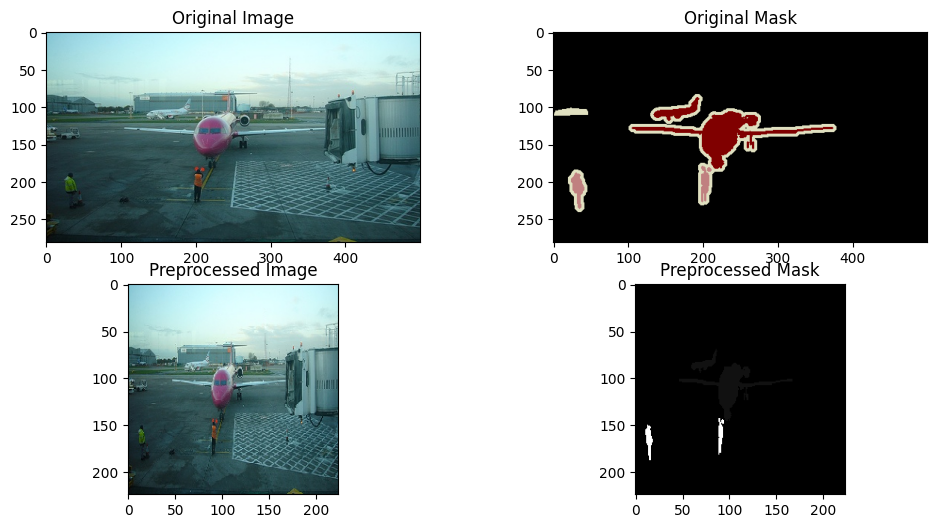

In [4]:
## Show an image and the corresponding mask, before and after preprocessing

import os
from utils.plotting import display_image_and_mask

image_path = os.path.join(image_dir, os.listdir(image_dir)[1])
mask_path = os.path.join(mask_dir, os.listdir(mask_dir)[0])
display_image_and_mask(image_path, mask_path)

In [5]:
from utils.plotting import create_class_pixel_table

df = create_class_pixel_table(train_masks)
print(df)

          Class  Pixel Count
0    background     87348440
1     aeroplane       847801
2       bicycle       343800
3          bird      1039049
4          boat       700002
5        bottle       783454
6           bus      1960339
7           car      1688119
8           cat      2730796
9         chair      1097031
10          cow      1112019
11  diningtable      1328527
12          dog      2088754
13        horse      1112213
14    motorbike      1144686
15       person      5660452
16  pottedplant       574202
17        sheep       955116
18         sofa      1620815
19        train      1915739
20    tvmonitor       858726


## Backbone architectures

DeepLab algorithm is build upon the Resnet101 architecture trained on imagenet dataset. In order to help building the DeepLab algorithm, we will take a look at its architecture.

In [10]:
from tensorflow.keras.applications import ResNet50

IMG_SIZE = 224
input_shape=(IMG_SIZE, IMG_SIZE, 3)
base_model = ResNet50(weights='imagenet', include_top=True, input_shape=input_shape)

base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

base_model.summary()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [1]:
from tensorflow.keras.applications import ResNet101

IMG_SIZE = 224
input_shape=(IMG_SIZE, IMG_SIZE, 3)
base_model = ResNet101(weights='imagenet', include_top=True, input_shape=input_shape)

base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

base_model.summary()

Model: "resnet101"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 44,707,176 (170.54 MB)

 Trainable params: 44,601,832 (170.14 MB)

 Non-trainable params: 105,344 (411.50 KB)

In [8]:
from utils.network_inspection import print_all_layers


print_all_layers(base_model)

Layer: resnet101, Type: Functional
  Layer: input_layer, Type: InputLayer
  Layer: conv1_pad, Type: ZeroPadding2D
  Layer: conv1_conv, Type: Conv2D, Kernel Size: (7, 7), Strides: (2, 2), Dilation Rate: (1, 1)
  Layer: conv1_bn, Type: BatchNormalization
  Layer: conv1_relu, Type: Activation
  Layer: pool1_pad, Type: ZeroPadding2D
  Layer: pool1_pool, Type: MaxPooling2D
  Layer: conv2_block1_1_conv, Type: Conv2D, Kernel Size: (1, 1), Strides: (1, 1), Dilation Rate: (1, 1)
  Layer: conv2_block1_1_bn, Type: BatchNormalization
  Layer: conv2_block1_1_relu, Type: Activation
  Layer: conv2_block1_2_conv, Type: Conv2D, Kernel Size: (3, 3), Strides: (1, 1), Dilation Rate: (1, 1)
  Layer: conv2_block1_2_bn, Type: BatchNormalization
  Layer: conv2_block1_2_relu, Type: Activation
  Layer: conv2_block1_0_conv, Type: Conv2D, Kernel Size: (1, 1), Strides: (1, 1), Dilation Rate: (1, 1)
  Layer: conv2_block1_3_conv, Type: Conv2D, Kernel Size: (1, 1), Strides: (1, 1), Dilation Rate: (1, 1)
  Layer: conv

## Backbone


### Modified Resnet101 architecture



In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from deep_lab.layers import ASPP, Backbone, Decoder

IMG_SIZE = 224
input_shape = (IMG_SIZE, IMG_SIZE, 3)
input = tf.keras.Input(shape=input_shape)

backbone_model = Backbone()
aspp_model = ASPP()
decoder_model = Decoder()

output_backone = backbone_model(input, training=True)
output_resnet = backbone_model.resnet_model(input, training=True)
output_cascaded_blocks = backbone_model.cascaded_blocks(output_resnet, training=True)
output_aspp = aspp_model(output_backone, training=True)
low_level_feature = backbone_model.resnet_model.get_layer('conv2_block3_out').output
output_decoder = decoder_model(output_backone, low_level_feature, training=True)

print("Backbone model:")
backbone_model = Model(inputs=input, outputs=output_backone)
backbone_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
backbone_model.summary()

print("ResNet without cascaded blocks model:")
resnet_model = Model(inputs=input, outputs=output_resnet)
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet_model.summary()

print("Cascaded blocks model:")
cascaded_model = Model(inputs=output_resnet, outputs=output_cascaded_blocks)
cascaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cascaded_model.summary()

print("ASPP model:")
aspp_model = Model(inputs=output_backone, outputs=output_aspp)
aspp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
aspp_model.summary()

print("Decodeur model")
decoder_model = Model(inputs=output_backone, outputs=output_decoder)
decoder_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
decoder_model.summary()

Backbone model:


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ backbone (Backbone)             │ (None, 14, 14, 2048)   │    56,064,384 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,064,384 (213.87 MB)

 Trainable params: 55,940,608 (213.40 MB)

 Non-trainable params: 123,776 (483.50 KB)

ResNet without cascaded blocks model:


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet101 (Functional)          │ (None, 7, 7, 2048)     │    42,658,176 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,658,176 (162.73 MB)

 Trainable params: 42,552,832 (162.33 MB)

 Non-trainable params: 105,344 (411.50 KB)

Cascaded blocks model:


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_1484CLONE          │ (None, 7, 7, 2048)     │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cascaded_blocks                 │ (None, 7, 7, 2048)     │    13,406,208 │
│ (CascadedBlocks)                │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,406,208 (51.14 MB)

 Trainable params: 13,387,776 (51.07 MB)

 Non-trainable params: 18,432 (72.00 KB)

ASPP model:


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_1483CLONE          │ (None, 14, 14, 2048)   │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ aspp_3 (ASPP)                   │ (None, 14, 14, 256)    │    15,538,176 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,538,176 (59.27 MB)

 Trainable params: 15,535,104 (59.26 MB)

 Non-trainable params: 3,072 (12.00 KB)

Decodeur model


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_7[1]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[1][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[1][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[1][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[1][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[1][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[1][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[1][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 5,668,693 (21.62 MB)

 Trainable params: 5,664,629 (21.61 MB)

 Non-trainable params: 4,064 (15.88 KB)